# A Julia Note at Colab

This notebook gives instructions for getting started with using Julia at Colab. The basic issues are: (1) how to make Colab aware of my files located at "My Drive"; and (2) how to load packages.

## Mounting My Drive

There is currently no Julia command for this, but can be done in Python. Therefore, change the "Runtime type" (see "Connect" at the top right menu bar) to Python. Run the next cell, and then change back to Julia.

In [1]:
from google.colab import drive                #do this in Python, then switch to Julia
drive.mount('/content/drive')

Mounted at /content/drive


## Load Packages

Colab has Julia's standard libraries installed, plus a rather short list of external packages, so you probably have to add some. To see which external packages that are installed, do `import Pkg; Pkg.status()`.

In [1]:
using Statistics, Printf, Dates, LinearAlgebra, DelimitedFiles  #Standard libraries

using Plots                             #external, but already installed
default(size = (480,320),fmt = :png)

In [2]:
import Pkg
Pkg.add(["Distributions"])              #external (not installed) packages

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [31c24e10] + Distributions v0.25.120
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


# Load Files from "My Drive"

We need the `printmat.jl` file for matrix printing.

In [3]:
myfolder = "/content/drive/My Drive/Test"         #Julia code

include(joinpath(myfolder,"src/printmat.jl"))     #include the file (it has some functions)

@doc2

# Load Data from a csv File

The next cell displays the first few lines of a data file in a raw format. The subsequent cell loads the data into a matrix.

In [4]:
x = readdlm(joinpath(myfolder,"Data/MyData.csv"),',',skipstart=1)  #reading the csv file

printblue("\nfirst four lines of x:\n")
printmat(x[1:4,:])


first four lines of x:

197901.000     4.180     0.770    10.960
197902.000    -3.410     0.730    -2.090
197903.000     5.750     0.810    11.710
197904.000     0.050     0.800     3.270



### Creating Variables

In [5]:
ym  = round.(Int,x[:,1])             #yearmonth, like 200712
(Rme,Rf,R) = (x[:,2],x[:,3],x[:,4])  #creating variables from columns of x
Re  = R - Rf                         #do R .- Rf if R has several columns
dN = Date.(string.(ym),"yyyymm") #convert to string and then to Julia Date

printblue("first 4 observations:\n")
printmat(dN[1:4],Rme[1:4,:],Re[1:4,:],colNames=["","Rme","Re"])

first 4 observations:

                 Rme        Re
1979-01-01     4.180    10.190
1979-02-01    -3.410    -2.820
1979-03-01     5.750    10.900
1979-04-01     0.050     2.470



# Some Descriptive Statistics

## Means and Standard Deviations

The next few cells estimate means, standard deviations, covariances and correlations of the variables `Rme` (US equity market excess return) and `Re` (excess returns for a segment of the market, small growth firms).

In [6]:
μ = mean([Rme Re],dims=1)    #,dims=1 to calculate average along a column
σ = std([Rme Re],dims=1)     #do \sigma[Tab] to get σ

printmat([μ;σ];colNames=["Rme","Re"],rowNames=["mean","std"])

           Rme        Re
mean     0.602     0.303
std      4.604     8.572



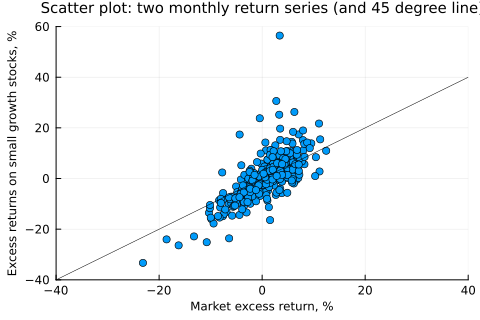

In [7]:
p1 = scatter( Rme,Re,
              fillcolor = :blue,
              legend = false,
              xlim = (-40,40),
              ylim = (-40,60),
              title = "Scatter plot: two monthly return series (and 45 degree line)",
              titlefontsize = 10,
              xlabel = "Market excess return, %",
              ylabel = "Excess returns on small growth stocks, %",
              guidefontsize = 8 )
plot!([-40;60],[-40;60],color=:black,linewidth=0.5)   #easier to keep this outside plot()
display(p1)